In [1]:
import pandas as pd
import numpy as np

# PRÉ-PROCESSAMENTO

In [2]:
belo_horizonte = pd.read_csv("data/data_Belo_Horizonte.csv")


In [3]:
belo_horizonte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3788 entries, 0 to 3787
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CODMUNNASC  3788 non-null   int64  
 1   DTNASC      3788 non-null   int64  
 2   IDADEMAE    3788 non-null   int64  
 3   ESCMAE      3788 non-null   float64
 4   QTDFILVIVO  3788 non-null   float64
 5   QTDFILMORT  3788 non-null   float64
 6   GRAVIDEZ    3788 non-null   float64
 7   GESTACAO    3774 non-null   float64
 8   PARTO       3788 non-null   float64
 9   PESO        3788 non-null   float64
 10  SEXO        3788 non-null   int64  
 11  RACACOR     3551 non-null   float64
 12  APGAR1      3744 non-null   float64
 13  APGAR5      3740 non-null   float64
 14  IDANOMAL    3722 non-null   float64
 15  CONSULTAS   3788 non-null   float64
 16  ESTCIVMAE   3788 non-null   float64
 17  CODOCUPMAE  2410 non-null   float64
 18  LOCNASC     3788 non-null   int64  
 19  Regiao      3788 non-null  

In [4]:
belo_horizonte.drop(['CODOCUPMAE', 'Regiao'], inplace=True, axis=1)
belo_horizonte = belo_horizonte.dropna(subset=['APGAR1', 'APGAR5', 'IDANOMAL'])
belo_horizonte['RACACOR'] = belo_horizonte['RACACOR'].fillna(0)
belo_horizonte['GESTACAO'] = belo_horizonte['GESTACAO'].fillna(9)
belo_horizonte.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3678 entries, 0 to 3787
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CODMUNNASC  3678 non-null   int64  
 1   DTNASC      3678 non-null   int64  
 2   IDADEMAE    3678 non-null   int64  
 3   ESCMAE      3678 non-null   float64
 4   QTDFILVIVO  3678 non-null   float64
 5   QTDFILMORT  3678 non-null   float64
 6   GRAVIDEZ    3678 non-null   float64
 7   GESTACAO    3678 non-null   float64
 8   PARTO       3678 non-null   float64
 9   PESO        3678 non-null   float64
 10  SEXO        3678 non-null   int64  
 11  RACACOR     3678 non-null   float64
 12  APGAR1      3678 non-null   float64
 13  APGAR5      3678 non-null   float64
 14  IDANOMAL    3678 non-null   float64
 15  CONSULTAS   3678 non-null   float64
 16  ESTCIVMAE   3678 non-null   float64
 17  LOCNASC     3678 non-null   int64  
 18  CLASS       3678 non-null   object 
dtypes: float64(13), int64(5), o

## Discretização

In [5]:
belo_horizonte_data = belo_horizonte.copy()
belo_horizonte_data['IDADEMAE'] = pd.cut(x=belo_horizonte_data['IDADEMAE'], bins=[-1,9,14,19,24,29,34,39,44,49,54,59,64,69,80])
belo_horizonte_data['QTDFILVIVO'] = pd.cut(x=belo_horizonte_data['QTDFILVIVO'], bins=[-1,0,2,4,6,8,10,12,20])
belo_horizonte_data['QTDFILMORT'] = pd.cut(x=belo_horizonte_data['QTDFILMORT'], bins=[-1,0,2,4,6,8,10,12,20])
belo_horizonte_data['PESO'] = pd.cut(x=belo_horizonte_data['PESO'], bins=[-1,499,999,1499,2499,2999,3999,6000])
belo_horizonte_data['APGAR1'] = pd.cut(x=belo_horizonte_data['APGAR1'], bins=[-1,2,4,100], labels=["0 a 2", "3 a 4", "5 a 7"])
belo_horizonte_data['APGAR5'] = pd.cut(x=belo_horizonte_data['APGAR5'], bins=[-1,2,4,100], labels=["0 a 2", "3 a 4", "5 a 7"])

In [6]:
belo_horizonte['IDADEMAE'] = pd.cut(x=belo_horizonte['IDADEMAE'], bins=[-1,9,14,19,24,29,34,39,44,49,54,59,64,69,80], labels=["<10", "10 a 14", "15 a 19", " 20 a 24", "25 a 29", "30 a 34", "35 a 39", "40 a 44", "45 a 49", "50 a 54", "55 a 59", "60 a 64", "65 a 69", ">60"])
belo_horizonte['QTDFILVIVO'] = pd.cut(x=belo_horizonte['QTDFILVIVO'], bins=[-1,0,2,4,6,8,10,12,20], labels=["0", "1 a 2", "3 a 4", "5 a 6", "7 a 8", "9 a 10", "11 a 12", ">12"])
belo_horizonte['QTDFILMORT'] = pd.cut(x=belo_horizonte['QTDFILMORT'], bins=[-1,0,2,4,6,8,10,12,20], labels=["0", "1 a 2", "3 a 4", "5 a 6", "7 a 8", "9 a 10", "11 a 12", ">12"])
belo_horizonte['PESO'] = pd.cut(x=belo_horizonte['PESO'], bins=[-1,499,999,1499,2499,2999,3999,6000], labels=["<500", "500 a 999", "1000 a 1499", "1500 a 2499", "2500 a 2999", "3000 a 3999", ">=4000"])
belo_horizonte['APGAR1'] = pd.cut(x=belo_horizonte['APGAR1'], bins=[-1,2,4,100], labels=["0 a 2", "3 a 4", "5 a 7"])
belo_horizonte['APGAR5'] = pd.cut(x=belo_horizonte['APGAR5'], bins=[-1,2,4,100], labels=["0 a 2", "3 a 4", "5 a 7"])
belo_horizonte['LOCNASC'] = belo_horizonte['LOCNASC'].map({9:'Ignorado', 1:'Hospital', 2:'Outro Estab Saúde', 3:'Domicílio', 4:'Outros'}) 
belo_horizonte['ESTCIVMAE'] = belo_horizonte['ESTCIVMAE'].map({1:'Solteira', 2:'Casada', 3: 'Viuva', 4:'Separado judicialmente/Divorciado', 5: 'União consensual', 9:'Ignorado'}) 
belo_horizonte['CONSULTAS'] = belo_horizonte['CONSULTAS'].map({1: 'Nenhuma', 2: 'de 1 a 3', 3: 'de 4 a 6', 4: '7 e mais', 9: 'Ignorado'})
belo_horizonte['IDANOMAL'] = belo_horizonte['IDANOMAL'].map({9:'Ignorado', 1:'Sim', 2:'Não'})
belo_horizonte['RACACOR'] = belo_horizonte['RACACOR'].map({1:'Branca', 2:'Preta', 3:'Amarela', 4:'Parda', 5: 'Indígena'})
belo_horizonte['PARTO'] = belo_horizonte['PARTO'].map({9:'Ignorado', 1:'Vaginal', 2: 'Cesáreo'})
belo_horizonte['GESTACAO'] = belo_horizonte['GESTACAO'].map({9:'Ignorado', 1:'Menos de 22 semanas', 2:'22 a 27 semanas', 3:'28 a 31 semanas', 4:'32 a 36 semanas', 5:'37 a 41 semanas', 6:'42 semanas e mais'})
belo_horizonte['GRAVIDEZ']= belo_horizonte['GRAVIDEZ'].map({9:'Ignorado', 1:'Única', 2:'Dupla', 3:'Tripla e mais'})
belo_horizonte['ESCMAE'] = belo_horizonte['ESCMAE'].map({1:'Nenhuma', 2:'1 a 3 anos', 3:'4 a 7 anos', 4:'8 a 11 anos', 5:'12 e mais', 9:'Ignorado'})
belo_horizonte['SEXO'] = belo_horizonte['SEXO'].map({0:'Ignorado, não informado', 1:'Masculino', 2:'Feminino'})

Hospital             3655
Domicílio              12
Outros                  7
Outro Estab Saúde       4
Name: LOCNASC, dtype: int64

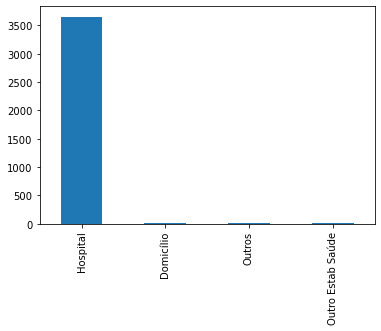

In [7]:
#Local de ocorrência do nascimento
belo_horizonte['LOCNASC'].value_counts().plot(kind='bar')
belo_horizonte['LOCNASC'].value_counts()

Solteira                             1910
Casada                               1568
União consensual                       99
Separado judicialmente/Divorciado      78
Viuva                                  10
Ignorado                                6
Name: ESTCIVMAE, dtype: int64

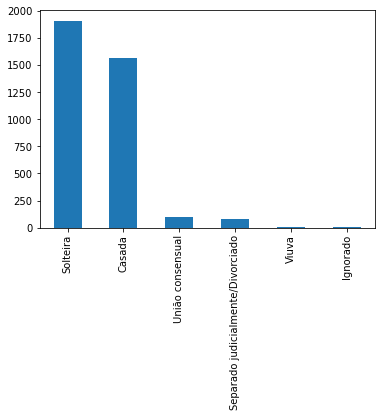

In [8]:
#Estado civil
belo_horizonte['ESTCIVMAE'].value_counts().plot(kind='bar')
belo_horizonte['ESTCIVMAE'].value_counts()

7 e mais    1917
de 4 a 6    1099
de 1 a 3     491
Nenhuma      121
Ignorado       5
Name: CONSULTAS, dtype: int64

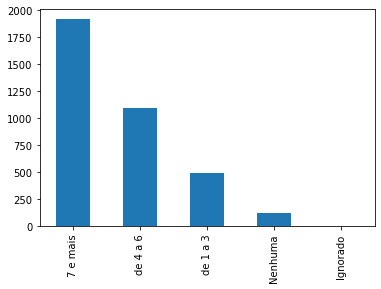

In [9]:
#Número de consultas de pré-natal
belo_horizonte['CONSULTAS'].value_counts().plot(kind='bar')
belo_horizonte['CONSULTAS'].value_counts()

Não    3259
Sim     396
Name: IDANOMAL, dtype: int64

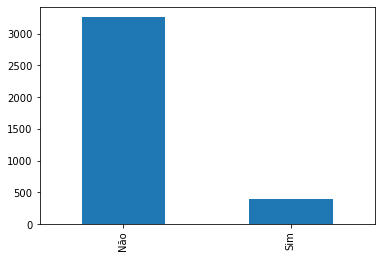

In [10]:
#Anomalia congênita
belo_horizonte['IDANOMAL'].value_counts().plot(kind='bar')
belo_horizonte['IDANOMAL'].value_counts()

Parda       2352
Branca       994
Preta        128
Amarela       25
Indígena       4
Name: RACACOR, dtype: int64

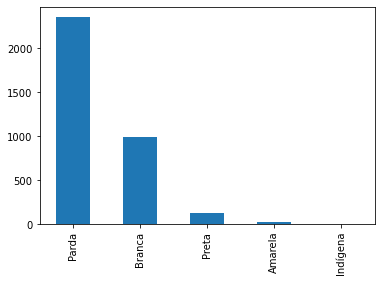

In [11]:
#Raça/Cor
belo_horizonte['RACACOR'].value_counts().plot(kind='bar')
belo_horizonte['RACACOR'].value_counts()

Vaginal     1866
Cesáreo     1811
Ignorado       1
Name: PARTO, dtype: int64

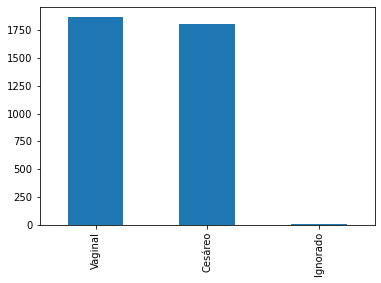

In [12]:
#Tipo de parto
belo_horizonte['PARTO'].value_counts().plot(kind='bar')
belo_horizonte['PARTO'].value_counts()

37 a 41 semanas        1981
22 a 27 semanas         802
32 a 36 semanas         462
28 a 31 semanas         328
Menos de 22 semanas      66
42 semanas e mais        23
Ignorado                 14
Name: GESTACAO, dtype: int64

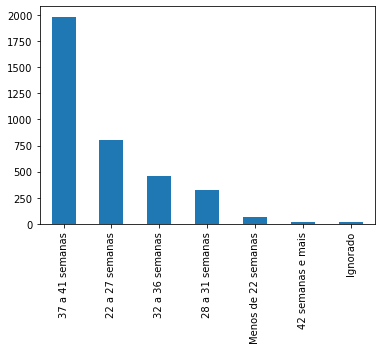

In [13]:
#Semanas de gestação
belo_horizonte['GESTACAO'].value_counts().plot(kind='bar')
belo_horizonte['GESTACAO'].value_counts()

Única            3431
Dupla             220
Tripla e mais      26
Ignorado            1
Name: GRAVIDEZ, dtype: int64

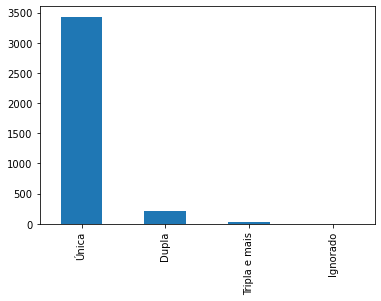

In [14]:
#Tipo de gravidez
belo_horizonte['GRAVIDEZ'].value_counts().plot(kind='bar')
belo_horizonte['GRAVIDEZ'].value_counts()

8 a 11 anos    2214
12 e mais       703
4 a 7 anos      656
1 a 3 anos       68
Ignorado         20
Nenhuma          10
Name: ESCMAE, dtype: int64

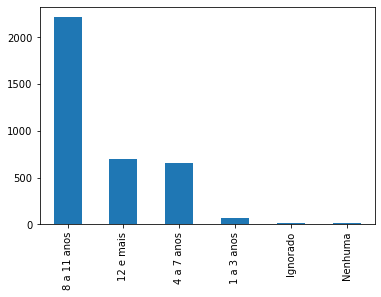

In [15]:
#Escolaridade, anos de estudo concluídos
belo_horizonte['ESCMAE'].value_counts().plot(kind='bar')
belo_horizonte['ESCMAE'].value_counts()

25 a 29     855
 20 a 24    817
30 a 34     766
35 a 39     537
15 a 19     510
40 a 44     162
10 a 14      25
45 a 49       6
<10           0
50 a 54       0
55 a 59       0
60 a 64       0
65 a 69       0
>60           0
Name: IDADEMAE, dtype: int64

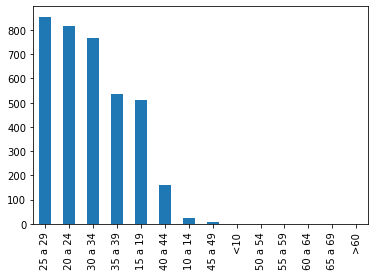

In [16]:
#Idade da mãe
belo_horizonte['IDADEMAE'].value_counts().plot(kind='bar')
belo_horizonte['IDADEMAE'].value_counts()

0          1909
1 a 2      1480
3 a 4       239
5 a 6        36
7 a 8        13
9 a 10        1
11 a 12       0
>12           0
Name: QTDFILVIVO, dtype: int64

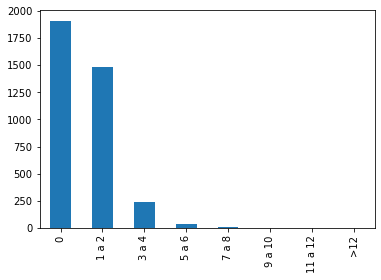

In [17]:
#Número de filhos vivos
belo_horizonte['QTDFILVIVO'].value_counts().plot(kind='bar')
belo_horizonte['QTDFILVIVO'].value_counts()

0          3157
1 a 2       490
3 a 4        26
5 a 6         3
7 a 8         2
9 a 10        0
11 a 12       0
>12           0
Name: QTDFILMORT, dtype: int64

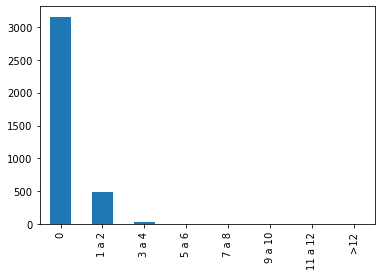

In [18]:
#Número de filhos mortos
belo_horizonte['QTDFILMORT'].value_counts().plot(kind='bar')
belo_horizonte['QTDFILMORT'].value_counts()

3000 a 3999    1248
500 a 999       799
2500 a 2999     637
1500 a 2499     485
1000 a 1499     237
<500            181
>=4000           91
Name: PESO, dtype: int64

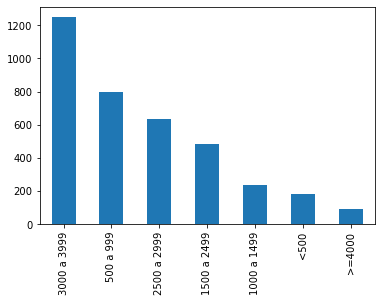

In [19]:
#Peso ao nascer, em gramas
belo_horizonte['PESO'].value_counts().plot(kind='bar')
belo_horizonte['PESO'].value_counts()

0 a 2    1713
5 a 7    1589
3 a 4     376
Name: APGAR1, dtype: int64

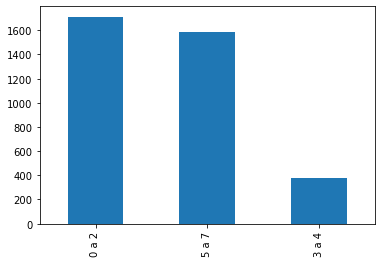

In [20]:
#Apgar no primeiro minuto
belo_horizonte['APGAR1'].value_counts().plot(kind='bar')
belo_horizonte['APGAR1'].value_counts()

5 a 7    1779
0 a 2    1754
3 a 4     145
Name: APGAR5, dtype: int64

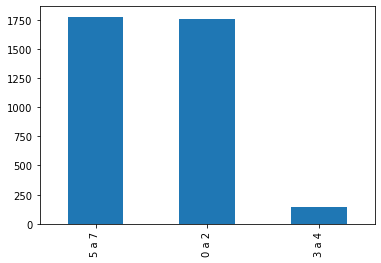

In [21]:
#Apgar no quinto minuto
belo_horizonte['APGAR5'].value_counts().plot(kind='bar')
belo_horizonte['APGAR5'].value_counts()

Masculino                  1909
Feminino                   1759
Ignorado, não informado      10
Name: SEXO, dtype: int64

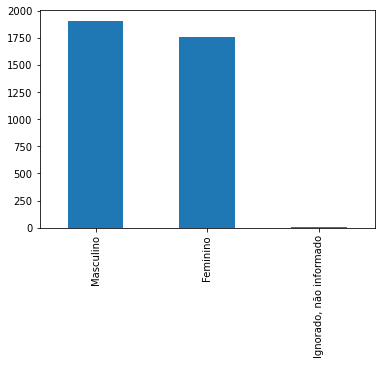

In [22]:
#Sexo
belo_horizonte['SEXO'].value_counts().plot(kind='bar')
belo_horizonte['SEXO'].value_counts()

In [23]:
belo_horizonte.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3678 entries, 0 to 3787
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CODMUNNASC  3678 non-null   int64   
 1   DTNASC      3678 non-null   int64   
 2   IDADEMAE    3678 non-null   category
 3   ESCMAE      3671 non-null   object  
 4   QTDFILVIVO  3678 non-null   category
 5   QTDFILMORT  3678 non-null   category
 6   GRAVIDEZ    3678 non-null   object  
 7   GESTACAO    3676 non-null   object  
 8   PARTO       3678 non-null   object  
 9   PESO        3678 non-null   category
 10  SEXO        3678 non-null   object  
 11  RACACOR     3503 non-null   object  
 12  APGAR1      3678 non-null   category
 13  APGAR5      3678 non-null   category
 14  IDANOMAL    3655 non-null   object  
 15  CONSULTAS   3633 non-null   object  
 16  ESTCIVMAE   3671 non-null   object  
 17  LOCNASC     3678 non-null   object  
 18  CLASS       3678 non-null   object  
dtypes: cat

# Biologicos
- PESO 
- APGAR1 
- APGAR5 
- GESTAÇÃO 
- PARTO 
- TIPO DE GRAVIDEZ 
- ANOMALIA CONGÊNITA

# Sociais

- ESTADO CIVIL 
- IDADE DA MÃE 
- LOCAL DO PARTO 
- QUANT. DE FILHOS VIVOS 
- QUANT. DE FILHOS MORTOS 
- ESCOLARIDADE DA MÂE 
- RAÇA / COR 
- NÚMERO DE CONSULTAS MÉDICAS PRÉ NATAL 

In [24]:
biologicos = ['PESO', 'APGAR1', 'APGAR5', 'SEXO','GESTACAO', 'PARTO', 'GRAVIDEZ', 'IDANOMAL', 'CLASS']

sociais = ['ESTCIVMAE', 'IDADEMAE', 'LOCNASC', 'QTDFILVIVO', 'QTDFILMORT', 'ESCMAE', 'RACACOR', 'CONSULTAS', 'CLASS']

In [45]:
belo_horizonte_biologico_data = belo_horizonte_data[biologicos]
belo_horizonte_sociais_data = belo_horizonte_data[sociais]

belo_horizonte_biologico_df = belo_horizonte[biologicos]
belo_horizonte_sociais_df = belo_horizonte[sociais]

In [47]:
belo_horizonte_biologico_df.head()

,PESO,APGAR1,APGAR5,SEXO,GESTACAO,PARTO,GRAVIDEZ,IDANOMAL,CLASS
0,500 a 999,0 a 2,0 a 2,Masculino,22 a 27 semanas,Vaginal,Única,Não,Morto
1,500 a 999,0 a 2,0 a 2,Masculino,22 a 27 semanas,Vaginal,Única,Não,Morto
2,500 a 999,5 a 7,5 a 7,Masculino,22 a 27 semanas,Vaginal,Única,Não,Morto
3,<500,3 a 4,5 a 7,Masculino,22 a 27 semanas,Vaginal,Única,Não,Morto
4,500 a 999,5 a 7,0 a 2,Masculino,28 a 31 semanas,Cesáreo,Única,Não,Morto


In [48]:
belo_horizonte_sociais_df.head()

,ESTCIVMAE,IDADEMAE,LOCNASC,QTDFILVIVO,QTDFILMORT,ESCMAE,RACACOR,CONSULTAS,CLASS
0,Casada,20 a 24,Hospital,1 a 2,0,8 a 11 anos,Branca,Nenhuma,Morto
1,Casada,20 a 24,Hospital,0,0,8 a 11 anos,Parda,de 4 a 6,Morto
2,Solteira,20 a 24,Hospital,1 a 2,0,8 a 11 anos,Parda,de 4 a 6,Morto
3,Casada,25 a 29,Hospital,0,0,8 a 11 anos,Parda,de 1 a 3,Morto
4,Casada,35 a 39,Hospital,1 a 2,0,8 a 11 anos,Branca,7 e mais,Morto


In [49]:
belo_horizonte_biologico_df.to_csv('belo_horizonte_biologico.csv', index=False )
belo_horizonte_sociais_df.to_csv('belo_horizonte_sociais.csv', index=False )

belo_horizonte_biologico_data.to_csv('belo_horizonte_biologico_data.csv', index=False )
belo_horizonte_sociais_data.to_csv('belo_horizonte_sociais_data.csv', index=False )

# CLASSIFICADORES

In [29]:
from weka.classifiers import Classifier,Evaluation
from weka.core.converters import Loader
from weka.core.classes import Random

import pydotplus
from IPython.display import SVG

import weka.core.jvm as jvm
jvm.start()

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/home/isaac/anaconda3/lib/python3.8/site-packages/javabridge/jars/rhino-1.7R4.jar', '/home/isaac/anaconda3/lib/python3.8/site-packages/javabridge/jars/runnablequeue.jar', '/home/isaac/anaconda3/lib/python3.8/site-packages/javabridge/jars/cpython.jar', '/home/isaac/anaconda3/lib/python3.8/site-packages/weka/lib/weka.jar', '/home/isaac/anaconda3/lib/python3.8/site-packages/weka/lib/python-weka-wrapper.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support disabled


In [30]:
loader=Loader("weka.core.converters.CSVLoader")
cvp=Classifier(classname='weka.classifiers.meta.CVParameterSelection')

#Leeando dataset pré-processado
belo_horizonte_sociais = loader.load_file("belo_horizonte_sociais_data.csv", class_index="last")

belo_horizonte_biologico = loader.load_file("belo_horizonte_biologico_data.csv", class_index="last")


In [31]:
#Evaluação com crossvalidation, 10 particões
def classifier_estimate(data, cls_name, options=[]):
    opt=['-W',cls_name,'-X','10']
    opt=['-W',cls_name,'-X','10']
    for par in options:
        opt.append('-P')
        opt.append(par)
    cvp.options=opt
    evl = Evaluation(data)
    evl.crossvalidate_model(cvp, data, 10, Random(1))
    print(evl.percent_correct)
    print(evl.summary())
    print(evl.class_details()) 
    print(evl.matrix())
    return cvp

## Algoritmo C4.5

### Biologico

In [32]:
clf_C45_belo_horizonte_biologico = classifier_estimate(belo_horizonte_biologico,'weka.classifiers.trees.J48',['M 1 10 10','C 0.05 0.25 5'])
clf_C45_belo_horizonte_biologico

89.36922240348015

Correctly Classified Instances        3287               89.3692 %
Incorrectly Classified Instances       391               10.6308 %
Kappa statistic                          0.7873
Mean absolute error                      0.1691
Root mean squared error                  0.2945
Relative absolute error                 33.8115 %
Root relative squared error             58.8971 %
Total Number of Instances             3678     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0,856    0,068    0,926      0,856    0,889      0,790    0,914     0,917     Morto
                 0,932    0,144    0,866      0,932    0,898      0,790    0,914     0,865     Vivo
Weighted Avg.    0,894    0,106    0,896      0,894    0,894      0,790    0,914     0,891     

=== Confusion Matrix ===

    a    b   <-- classified as
 1570  265 |    a = Morto
  126 1717 |    b = Vivo



CVParameterSelection: No model built yet.

In [33]:
#Regras Geradas
clf_C45_belo_horizonte_biologico.build_classifier(belo_horizonte_biologico)
clf_C45_belo_horizonte_biologico

Cross-validated Parameter selection.
Classifier: weka.classifiers.trees.J48
Cross-validation Parameter: '-M' ranged from 1.0 to 10.0 with 10.0 steps
Cross-validation Parameter: '-C' ranged from 0.05 to 0.25 with 5.0 steps
Classifier Options: -M 3 -C 0.25

J48 pruned tree
------------------

GESTACAO <= 4
|   GESTACAO <= 3: Morto (1198.0/42.0)
|   GESTACAO > 3
|   |   IDANOMAL <= 1: Morto (146.0/3.0)
|   |   IDANOMAL > 1
|   |   |   PESO = (499, 999]: Morto (6.0/1.0)
|   |   |   PESO = (-1, 499]: Vivo (0.0)
|   |   |   PESO = (1499, 2499]
|   |   |   |   APGAR1 = 0 a 2
|   |   |   |   |   APGAR5 = 0 a 2
|   |   |   |   |   |   PARTO <= 1: Vivo (14.0/4.0)
|   |   |   |   |   |   PARTO > 1: Morto (25.0/10.0)
|   |   |   |   |   APGAR5 = 5 a 7: Vivo (20.0/5.0)
|   |   |   |   |   APGAR5 = 3 a 4: Morto (4.0)
|   |   |   |   APGAR1 = 5 a 7
|   |   |   |   |   PARTO <= 1: Morto (34.0/12.0)
|   |   |   |   |   PARTO > 1: Vivo (54.0/26.0)
|   |   |   |   APGAR1 = 3 a 4: Morto (14.0/2.0)
|   |  

### Sociais

In [34]:
clf_C45_belo_horizonte_sociais = classifier_estimate(belo_horizonte_sociais,'weka.classifiers.trees.J48',['M 1 10 10','C 0.05 0.25 5'])
clf_C45_belo_horizonte_sociais  

70.63621533442088

Correctly Classified Instances        2598               70.6362 %
Incorrectly Classified Instances      1080               29.3638 %
Kappa statistic                          0.4126
Mean absolute error                      0.4101
Root mean squared error                  0.4548
Relative absolute error                 82.0241 %
Root relative squared error             90.9641 %
Total Number of Instances             3678     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0,660    0,248    0,726      0,660    0,692      0,414    0,697     0,670     Morto
                 0,752    0,340    0,690      0,752    0,720      0,414    0,697     0,649     Vivo
Weighted Avg.    0,706    0,294    0,708      0,706    0,706      0,414    0,697     0,659     

=== Confusion Matrix ===

    a    b   <-- classified as
 1212  623 |    a = Morto
  457 1386 |    b = Vivo



Cross-validated Parameter selection.
Classifier: weka.classifiers.trees.J48
Cross-validation Parameter: '-M' ranged from 1.0 to 10.0 with 10.0 steps
Cross-validation Parameter: '-C' ranged from 0.05 to 0.25 with 5.0 steps
Classifier Options: -M 3 -C 0.25

No classifier built

In [35]:
#Regras Geradas
clf_C45_belo_horizonte_biologico.build_classifier(belo_horizonte_sociais)
clf_C45_belo_horizonte_sociais

Cross-validated Parameter selection.
Classifier: weka.classifiers.trees.J48
Cross-validation Parameter: '-M' ranged from 1.0 to 10.0 with 10.0 steps
Cross-validation Parameter: '-C' ranged from 0.05 to 0.25 with 5.0 steps
Classifier Options: -M 3 -C 0.1

J48 pruned tree
------------------

CONSULTAS <= 3
|   RACACOR <= 0
|   |   CONSULTAS <= 2
|   |   |   ESCMAE <= 4: Vivo (23.0/10.0)
|   |   |   ESCMAE > 4: Morto (5.0)
|   |   CONSULTAS > 2: Vivo (55.0/6.0)
|   RACACOR > 0: Morto (1673.0/450.0)
CONSULTAS > 3: Vivo (1922.0/591.0)

Number of Leaves  : 	5

Size of the tree : 	9

## Algoritmo JRIP

### Biologico

In [36]:
clf_JRip_belo_horizonte_biologico = classifier_estimate(belo_horizonte_biologico, "weka.classifiers.rules.JRip")
clf_JRip_belo_horizonte_biologico

89.0973355084285

Correctly Classified Instances        3277               89.0973 %
Incorrectly Classified Instances       401               10.9027 %
Kappa statistic                          0.7819
Mean absolute error                      0.1816
Root mean squared error                  0.3048
Relative absolute error                 36.3158 %
Root relative squared error             60.9618 %
Total Number of Instances             3678     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0,829    0,048    0,945      0,829    0,884      0,788    0,895     0,902     Morto
                 0,952    0,171    0,849      0,952    0,897      0,788    0,895     0,834     Vivo
Weighted Avg.    0,891    0,109    0,897      0,891    0,891      0,788    0,895     0,868     

=== Confusion Matrix ===

    a    b   <-- classified as
 1522  313 |    a = Morto
   88 1755 |    b = Vivo



Cross-validated Parameter selection.
Classifier: weka.classifiers.rules.JRip
Classifier Options: -M 3 -C 0.1

JRIP: No model built yet.

In [37]:
#Regras Geradas
clf_JRip_belo_horizonte_biologico.build_classifier(belo_horizonte_biologico)
clf_JRip_belo_horizonte_biologico

Cross-validated Parameter selection.
Classifier: weka.classifiers.rules.JRip
Classifier Options: -F 3 -N 2.0 -O 2 -S 1

JRIP rules:

(GESTACAO <= 3) => CLASS=Morto (1198.0/42.0)
(IDANOMAL <= 1) => CLASS=Morto (315.0/22.0)
(GESTACAO <= 4) and (PESO = (999, 1499]) => CLASS=Morto (39.0/7.0)
(GESTACAO <= 4) and (APGAR1 = 3 a 4) and (APGAR5 = 5 a 7) => CLASS=Morto (15.0/1.0)
(PESO = (1499, 2499]) and (SEXO <= 1) and (APGAR1 = 3 a 4) => CLASS=Morto (6.0/0.0)
(GESTACAO <= 4) and (PARTO >= 2) and (PESO = (499, 999]) => CLASS=Morto (4.0/0.0)
(PESO = (1499, 2499]) and (APGAR5 = 3 a 4) => CLASS=Morto (10.0/1.0)
(PESO = (1499, 2499]) and (GESTACAO <= 4) and (APGAR1 = 5 a 7) and (PARTO <= 1) => CLASS=Morto (34.0/12.0)
 => CLASS=Vivo (2057.0/299.0)

Number of Rules : 9

### Sociais

In [38]:
clf_JRip_belo_horizonte_sociais = classifier_estimate(belo_horizonte_sociais, "weka.classifiers.rules.JRip")
clf_JRip_belo_horizonte_sociais

70.71778140293638

Correctly Classified Instances        2601               70.7178 %
Incorrectly Classified Instances      1077               29.2822 %
Kappa statistic                          0.4143
Mean absolute error                      0.4053
Root mean squared error                  0.4518
Relative absolute error                 81.0699 %
Root relative squared error             90.3539 %
Total Number of Instances             3678     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0,678    0,264    0,719      0,678    0,698      0,415    0,725     0,717     Morto
                 0,736    0,322    0,697      0,736    0,716      0,415    0,725     0,665     Vivo
Weighted Avg.    0,707    0,293    0,708      0,707    0,707      0,415    0,725     0,691     

=== Confusion Matrix ===

    a    b   <-- classified as
 1244  591 |    a = Morto
  486 1357 |    b = Vivo



Cross-validated Parameter selection.
Classifier: weka.classifiers.rules.JRip
Classifier Options: -F 3 -N 2.0 -O 2 -S 1

JRIP: No model built yet.

In [39]:
#Regras Geradas
clf_JRip_belo_horizonte_sociais.build_classifier(belo_horizonte_sociais)
clf_JRip_belo_horizonte_sociais

Cross-validated Parameter selection.
Classifier: weka.classifiers.rules.JRip
Classifier Options: -F 3 -N 2.0 -O 2 -S 1

JRIP rules:

(CONSULTAS <= 2) and (QTDFILVIVO = (-1, 0]) => CLASS=Morto (314.0/38.0)
(CONSULTAS <= 3) and (RACACOR >= 1) => CLASS=Morto (1367.0/415.0)
 => CLASS=Vivo (1997.0/607.0)

Number of Rules : 3

# Algoritmo Apriori

In [40]:
!pip3 install mlxtend
from mlxtend.frequent_patterns import apriori, association_rules

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

<ipython-input-40-730effd2ef1d>:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


In [50]:
class Apriori:
    """Apriori Class. Its has Apriori steps."""
    threshold = 0.5
    df = None

    def __init__(self, df, threshold=None, transform_bol=False):

        self._validate_df(df)

        self.df = df
        if threshold is not None:
            self.threshold = threshold

        if transform_bol:
            self._transform_bol()

    def _validate_df(self, df=None):

        if df is None:
            raise Exception("df must be a valid pandas.DataDrame.")


    def _transform_bol(self):

        for column in self.df.columns:
            self.df[column] = self.df[column].apply(lambda x: True if x == 1 else False)


    def _apriori(self, use_colnames=False, max_len=None, count=True):

        apriori_df = apriori(
                    self.df, 
                    min_support=self.threshold,
                    use_colnames=use_colnames, 
                    max_len=max_len
                )
        if count:
            apriori_df['length'] = apriori_df['itemsets'].apply(lambda x: len(x))

        return apriori_df

    def run(self, use_colnames=False, max_len=None, count=True):

        return self._apriori(
                        use_colnames=use_colnames,
                        max_len=max_len,
                        count=count
                    )

    def filter(self, apriori_df, length, threshold):
        
        if 'length' not in apriori_df.columns:
            raise Exception("apriori_df has no length. Please run the Apriori with count=True.")

        return apriori_df[ (apriori_df['length'] == length) & (apriori_df['support'] >= threshold) ]

### Biologico

In [51]:
belo_horizonte_biologico_morto = belo_horizonte_biologico_df[belo_horizonte_biologico_df['CLASS']=='Morto']
belo_horizonte_biologico_morto.drop('CLASS', axis=True, inplace=True)

belo_horizonte_biologico_vivo = belo_horizonte_biologico_df[belo_horizonte_biologico_df['CLASS']=='Vivo']
belo_horizonte_biologico_vivo.drop('CLASS', axis=True, inplace=True)

belo_horizonte_biologico_encod_vivo = pd.get_dummies(belo_horizonte_biologico_vivo.astype(str))
belo_horizonte_biologico_encod_morto = pd.get_dummies(belo_horizonte_biologico_morto.astype(str))

/home/isaac/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### Vivo

In [52]:
apriori_runner_bio_vivo = Apriori(belo_horizonte_biologico_encod_vivo, threshold=0.5, transform_bol=True)
apriori_df_bio_vivo = apriori_runner_bio_vivo.run(use_colnames=True)
apriori_df_bio_vivo.sort_values(by=['support'], ascending=False)

,support,itemsets,length
7,0.985893,(IDANOMAL_Não),1
6,0.974498,(GRAVIDEZ_Única),1
17,0.960933,"(IDANOMAL_Não, GRAVIDEZ_Única)",2
4,0.867607,(GESTACAO_37 a 41 semanas),1
16,0.857298,"(IDANOMAL_Não, GESTACAO_37 a 41 semanas)",2
15,0.854585,"(GRAVIDEZ_Única, GESTACAO_37 a 41 semanas)",2
21,0.844818,"(IDANOMAL_Não, GRAVIDEZ_Única, GESTACAO_37 a 41 semanas)",3
0,0.586544,(PESO_3000 a 3999),1
9,0.583288,"(GRAVIDEZ_Única, PESO_3000 a 3999)",2
10,0.581118,"(IDANOMAL_Não, PESO_3000 a 3999)",2


In [53]:
rules_bio_vivo = association_rules(apriori_df_bio_vivo, metric='confidence', min_threshold=0.5)
rules_bio_vivo.sort_values(by=['lift'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
56,(PESO_3000 a 3999),"(IDANOMAL_Não, GRAVIDEZ_Única, GESTACAO_37 a 41 semanas)",0.586544,0.844818,0.544221,0.927845,1.098277,0.048699,2.150660
45,"(IDANOMAL_Não, GRAVIDEZ_Única, GESTACAO_37 a 41 semanas)",(PESO_3000 a 3999),0.844818,0.586544,0.544221,0.644188,1.098277,0.048699,1.162006
52,"(GRAVIDEZ_Única, GESTACAO_37 a 41 semanas)","(IDANOMAL_Não, PESO_3000 a 3999)",0.854585,0.581118,0.544221,0.636825,1.095863,0.047607,1.153391
49,"(IDANOMAL_Não, PESO_3000 a 3999)","(GRAVIDEZ_Única, GESTACAO_37 a 41 semanas)",0.581118,0.854585,0.544221,0.936508,1.095863,0.047607,2.290288
21,"(GRAVIDEZ_Única, GESTACAO_37 a 41 semanas)",(PESO_3000 a 3999),0.854585,0.586544,0.548562,0.641905,1.094385,0.047311,1.154599
24,(PESO_3000 a 3999),"(GRAVIDEZ_Única, GESTACAO_37 a 41 semanas)",0.586544,0.854585,0.548562,0.935245,1.094385,0.047311,2.245624
50,"(IDANOMAL_Não, GESTACAO_37 a 41 semanas)","(GRAVIDEZ_Única, PESO_3000 a 3999)",0.857298,0.583288,0.544221,0.634810,1.088330,0.044170,1.141083
51,"(GRAVIDEZ_Única, PESO_3000 a 3999)","(IDANOMAL_Não, GESTACAO_37 a 41 semanas)",0.583288,0.857298,0.544221,0.933023,1.088330,0.044170,2.130622
30,(PESO_3000 a 3999),"(IDANOMAL_Não, GESTACAO_37 a 41 semanas)",0.586544,0.857298,0.546934,0.932470,1.087685,0.044092,2.113164
27,"(IDANOMAL_Não, GESTACAO_37 a 41 semanas)",(PESO_3000 a 3999),0.857298,0.586544,0.546934,0.637975,1.087685,0.044092,1.142065


#### Morto

In [54]:
apriori_runner_bio_morto = Apriori(belo_horizonte_biologico_encod_morto, threshold=0.5, transform_bol=True)
apriori_df_bio_morto = apriori_runner_bio_morto.run(use_colnames=True)
apriori_df_bio_morto.sort_values(by=['support'], ascending=False)

,support,itemsets,length
2,0.891008,(GRAVIDEZ_Única),1
3,0.785831,(IDANOMAL_Não),1
4,0.691553,"(IDANOMAL_Não, GRAVIDEZ_Única)",2
0,0.546049,(SEXO_Masculino),1
1,0.510627,(PARTO_Vaginal),1


In [55]:
rules_bio_morto = association_rules(apriori_df_bio_morto, metric='confidence', min_threshold=0.5)
rules_bio_morto.sort_values(by=['lift'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(GRAVIDEZ_Única),(IDANOMAL_Não),0.891008,0.785831,0.691553,0.776147,0.987676,-0.008629,0.956738
0,(IDANOMAL_Não),(GRAVIDEZ_Única),0.785831,0.891008,0.691553,0.880028,0.987676,-0.008629,0.908475


### Sociais

In [56]:
belo_horizonte_sociais_morto = belo_horizonte_biologico_df[belo_horizonte_biologico_df['CLASS']=='Morto']
belo_horizonte_sociais_morto.drop('CLASS', axis=True, inplace=True)

belo_horizonte_sociais_vivo = belo_horizonte_biologico_df[belo_horizonte_biologico_df['CLASS']=='Vivo']
belo_horizonte_sociais_vivo.drop('CLASS', axis=True, inplace=True)

belo_horizonte_sociais_encod_vivo = pd.get_dummies(belo_horizonte_sociais_vivo.astype(str))
belo_horizonte_sociais_encod_morto = pd.get_dummies(belo_horizonte_sociais_morto.astype(str))

/home/isaac/.local/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### Vivo

In [57]:
apriori_runner_vivo = Apriori(belo_horizonte_sociais_encod_vivo, threshold=0.5, transform_bol=True)
apriori_df_vivo = apriori_runner_vivo.run(use_colnames=True)
apriori_df_vivo.sort_values(by=['support'], ascending=False)

,support,itemsets,length
7,0.985893,(IDANOMAL_Não),1
6,0.974498,(GRAVIDEZ_Única),1
17,0.960933,"(IDANOMAL_Não, GRAVIDEZ_Única)",2
4,0.867607,(GESTACAO_37 a 41 semanas),1
16,0.857298,"(IDANOMAL_Não, GESTACAO_37 a 41 semanas)",2
15,0.854585,"(GRAVIDEZ_Única, GESTACAO_37 a 41 semanas)",2
21,0.844818,"(IDANOMAL_Não, GRAVIDEZ_Única, GESTACAO_37 a 41 semanas)",3
0,0.586544,(PESO_3000 a 3999),1
9,0.583288,"(GRAVIDEZ_Única, PESO_3000 a 3999)",2
10,0.581118,"(IDANOMAL_Não, PESO_3000 a 3999)",2


In [58]:
rules_vivo = association_rules(apriori_df_vivo, metric='confidence', min_threshold=0.5)
rules_vivo.sort_values(by=['lift'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
56,(PESO_3000 a 3999),"(IDANOMAL_Não, GRAVIDEZ_Única, GESTACAO_37 a 41 semanas)",0.586544,0.844818,0.544221,0.927845,1.098277,0.048699,2.150660
45,"(IDANOMAL_Não, GRAVIDEZ_Única, GESTACAO_37 a 41 semanas)",(PESO_3000 a 3999),0.844818,0.586544,0.544221,0.644188,1.098277,0.048699,1.162006
52,"(GRAVIDEZ_Única, GESTACAO_37 a 41 semanas)","(IDANOMAL_Não, PESO_3000 a 3999)",0.854585,0.581118,0.544221,0.636825,1.095863,0.047607,1.153391
49,"(IDANOMAL_Não, PESO_3000 a 3999)","(GRAVIDEZ_Única, GESTACAO_37 a 41 semanas)",0.581118,0.854585,0.544221,0.936508,1.095863,0.047607,2.290288
21,"(GRAVIDEZ_Única, GESTACAO_37 a 41 semanas)",(PESO_3000 a 3999),0.854585,0.586544,0.548562,0.641905,1.094385,0.047311,1.154599
24,(PESO_3000 a 3999),"(GRAVIDEZ_Única, GESTACAO_37 a 41 semanas)",0.586544,0.854585,0.548562,0.935245,1.094385,0.047311,2.245624
50,"(IDANOMAL_Não, GESTACAO_37 a 41 semanas)","(GRAVIDEZ_Única, PESO_3000 a 3999)",0.857298,0.583288,0.544221,0.634810,1.088330,0.044170,1.141083
51,"(GRAVIDEZ_Única, PESO_3000 a 3999)","(IDANOMAL_Não, GESTACAO_37 a 41 semanas)",0.583288,0.857298,0.544221,0.933023,1.088330,0.044170,2.130622
30,(PESO_3000 a 3999),"(IDANOMAL_Não, GESTACAO_37 a 41 semanas)",0.586544,0.857298,0.546934,0.932470,1.087685,0.044092,2.113164
27,"(IDANOMAL_Não, GESTACAO_37 a 41 semanas)",(PESO_3000 a 3999),0.857298,0.586544,0.546934,0.637975,1.087685,0.044092,1.142065


#### Morto

In [59]:
apriori_runner_morto = Apriori(belo_horizonte_sociais_encod_morto, threshold=0.5, transform_bol=True)
apriori_df_morto = apriori_runner_morto.run(use_colnames=True)
apriori_df_morto.sort_values(by=['support'], ascending=False)

,support,itemsets,length
2,0.891008,(GRAVIDEZ_Única),1
3,0.785831,(IDANOMAL_Não),1
4,0.691553,"(IDANOMAL_Não, GRAVIDEZ_Única)",2
0,0.546049,(SEXO_Masculino),1
1,0.510627,(PARTO_Vaginal),1


In [60]:
rules_morto = association_rules(apriori_df_morto, metric='confidence', min_threshold=0.5)
rules_morto.sort_values(by=['lift'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(GRAVIDEZ_Única),(IDANOMAL_Não),0.891008,0.785831,0.691553,0.776147,0.987676,-0.008629,0.956738
0,(IDANOMAL_Não),(GRAVIDEZ_Única),0.785831,0.891008,0.691553,0.880028,0.987676,-0.008629,0.908475
